#  INTRODUCTION

In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score

# Loading the data

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
%cd /content/drive/MyDrive/Music_Genre

/content/drive/MyDrive/Music_Genre


In [26]:
df = pd.read_csv("user - preference.csv")
df.head()

,Age,Gender,Preference
0,20.0,female,Rock
1,19.0,female,Rock
2,20.0,female,Latino
3,22.0,female,Alternative
4,20.0,female,"Hiphop, Rap"


In [27]:
df.shape

(1010, 3)

# Cleaning the Data

Look into the data to find missing values

In [28]:
df.isnull().sum()

Age            7
Gender         6
Preference    74
dtype: int64

Firstly, we drop the missing data from dataframe and reset our index

In [29]:
df.dropna(inplace = True)
df.reset_index(drop=True,inplace=True)
row = len(df.index)

In [30]:
df.shape

(925, 3)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         925 non-null    float64
 1   Gender      925 non-null    object 
 2   Preference  925 non-null    object 
dtypes: float64(1), object(2)
memory usage: 21.8+ KB


All of numerical data has entered as float64 format and none of them has decimal part, thus we convert these data from float to integer format.

In [33]:
for each in range(0,2) :
    if type(df.iloc[1,each]) == np.float64 :
        df[df.columns[each]] = df[df.columns[each]].astype(int)
    else :
        df[df.columns[each]] = df[df.columns[each]]

Sorting categorical values :
Gender
Alcohol
Education

In [34]:
df.Gender.unique()

array(['female', 'male'], dtype=object)

In "Gender" column, there are "female" and "male" values, they convert as "female"= 0 , "male = 1"

In [35]:
for sex in range(0,row) :
    if df.loc[sex,'Gender'] == 'female' :
        df.loc[sex,'Gender'] = 0
    else :
        df.loc[sex,'Gender'] = 1

In [46]:
df['Gender'].tail()

920    0
921    1
922    0
923    0
924    0
Name: Gender, dtype: object

In [49]:
df['Gender'] = df['Gender'].astype(int)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         925 non-null    int64 
 1   Gender      925 non-null    int64 
 2   Preference  925 non-null    object
dtypes: int64(2), object(1)
memory usage: 21.8+ KB


# Exploring Data

In [52]:
df.corr()

,Age,Gender
Age,1.000000,0.126457
Gender,0.126457,1.000000


Age and gender have a small positive correlation

    Coefficient,

---


    Strength of Association         Positive	       Negative
    Small	                       .1 to .3	      -0.1 to -0.3
    Medium	                      .3 to .5	      -0.3 to -0.5
    Large                           .5 to 1.0	     -0.5 to -1.0

In [54]:
df.describe()

,Age,Gender
count,925.000000,925.000000
mean,20.419459,0.407568
std,2.800211,0.491648
min,15.000000,0.000000
25%,19.000000,0.000000
50%,20.000000,0.000000
75%,22.000000,1.000000
max,30.000000,1.000000


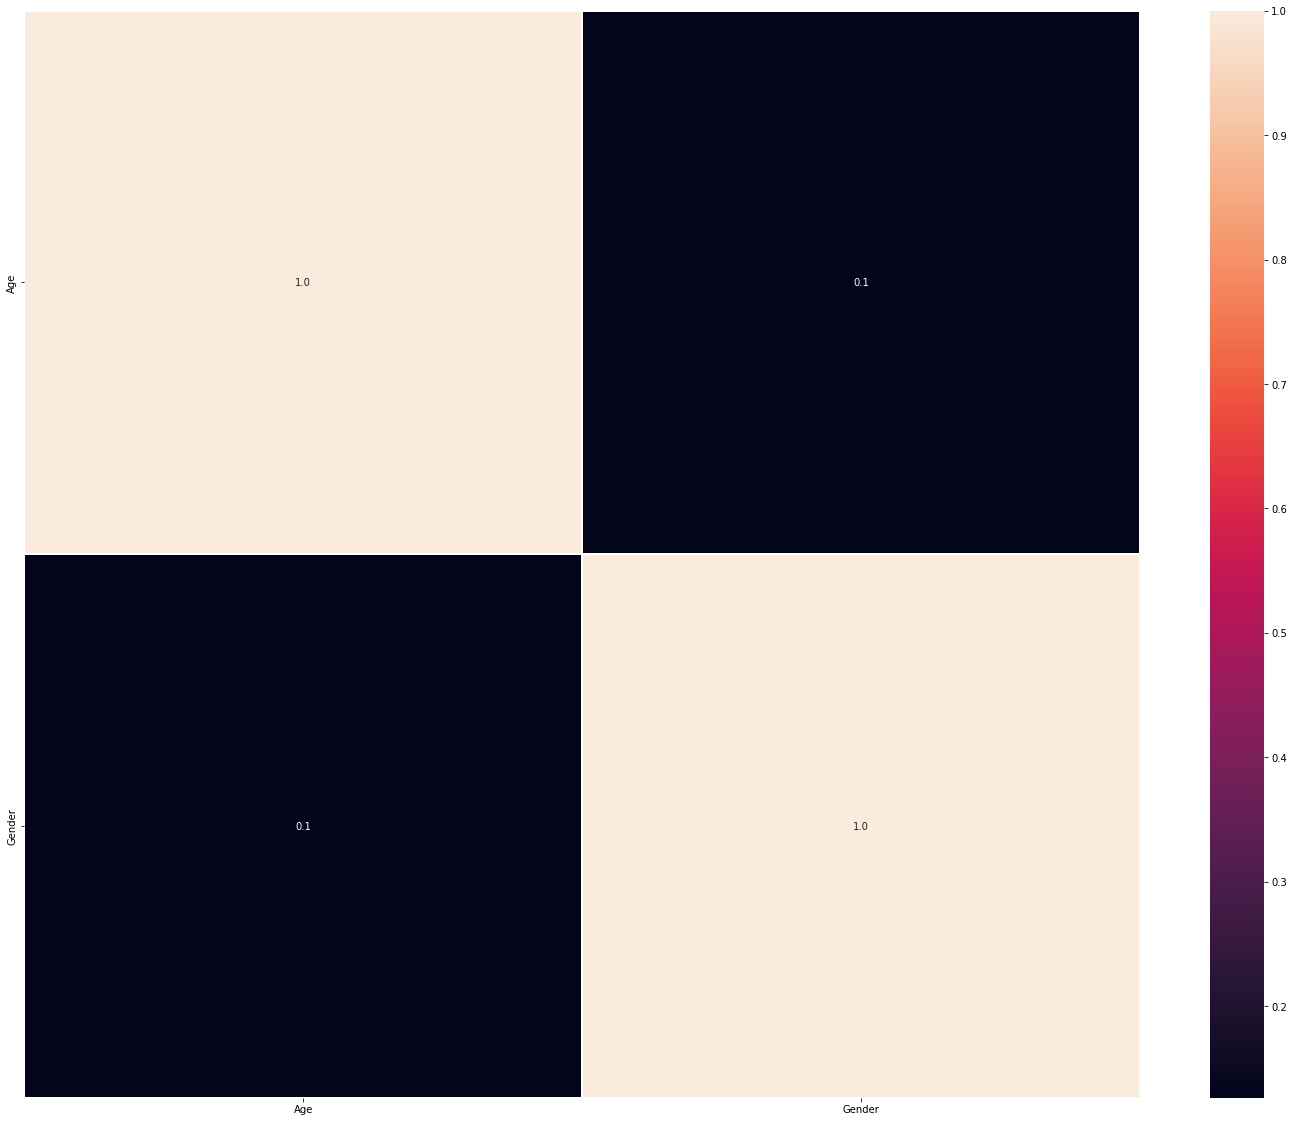

In [55]:
f,ax = plt.subplots(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

# Processing the Data
We need to divide the data into input data and output data.

Input : age, gender

Output : music preferrence

In [57]:
X= df.drop(columns=['Preference'])
y= df['Preference']

Splitting data into training set and test set

In [58]:
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size=0.2)

# Creating and Training the model

In [68]:
model= tree.DecisionTreeClassifier()

In [69]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [79]:
y_prediction = model.predict([[22,0]])
y_prediction

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Rock'], dtype=object)

The model was asked to predict the music preferrence of a 22-year-old female and the prediction was Rock.

In [84]:
y_prediction = model.predict([[30,0]])
y_prediction

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Classical music'], dtype=object)

The model was asked to predict the music preferrence of a 30-year-old female and the prediction was Classical music.

# Evaluation

We want to evaluate the model on its predictions.

In [85]:
predictions= model.predict(X_test)

In [86]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.08648648648648649

The accuracy of the model is 86.48%